# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [57]:
# %matplotlib notebook   # The whole image is not saved with matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [58]:
#Reading the file
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv",usecols = [1,2,3])
#Converting temp values to degree celsius
df["Data_Value"] = df["Data_Value"] * 0.1


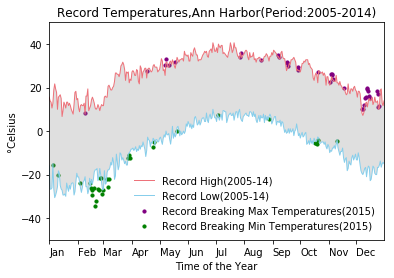

In [59]:
#Making a year column
df["Year"] = pd.DatetimeIndex(df["Date"]).year
#making a month-date format column
df["month-date"] = df.Date.astype("datetime64[ns]").dt.strftime("%m-%d")
#dataframe for year 2005-2014 and removing leap year outliers
df1 = df[(df["Year"] >= 2005) & (df["Year"] < 2015) & (df["month-date"]!="02-29")]
#dataframe for year 2015
df2 = df[df["Year"]==2015]
#slicing the dataset for only useful components
df1 = df1[["Element","Data_Value","month-date","Date"]]
df2 = df2[["Element","Data_Value","month-date","Date"]]
#2005-14 dataset containing only max temperature values
df1_A = df1[(df1["Element"]=="TMAX")]
#then dropping it as its useless now
df1_A = df1_A.drop(["Element"],axis = 1)
#2015 dataset containing only max temperature values
df2_A = df2[(df2["Element"]=="TMAX")]
#then dropping it as its useless now
df2_A = df2_A.drop(["Element"],axis = 1)

#2005-14 dataset containing only min temperature values
df1_B = df1[df1["Element"]=="TMIN"]
#dropping
df1_B = df1_B.drop(["Element"],axis = 1)
#2015 dataset containing only min temperature values
df2_B = df2[df2["Element"]=="TMIN"]
#dropping
df2_B = df2_B.drop(["Element"],axis = 1)

#Now we group for top 365 max and min temp values for 2005-14
max_values = df1_A.groupby(["month-date"])["Data_Value"].max()
min_values = df1_B.groupby(["month-date"])["Data_Value"].min()
#Now we group for top 365 max and min temp values for 2015
max_values_15 = df2_A.groupby(["Date"])["Data_Value"].max()
min_values_15 = df2_B.groupby(["Date"])["Data_Value"].min()

#Now we take 10-yr record breaking extreme temperatures of 2015
record_high = max_values_15[max_values_15.values > max_values.values]
record_low = min_values_15[min_values_15.values < min_values.values]
#changing index to datetime
record_high.index = record_high.index.astype("datetime64[ns]")
record_low.index = record_low.index.astype("datetime64[ns]")

#we take the values that span the x-axis,remeber to mention the dtype
import numpy as np
x_axis = np.arange("2015-01-01","2016-01-01",dtype = "datetime64[D]")

#first line plots for 10 yr interval
plt.plot(x_axis,max_values.values,color = "#ed727a",linewidth = 1)
plt.plot(x_axis,min_values.values,color = "skyblue",linewidth = 1)
#Then scatter plots for 2015 record breaking values
plt.scatter(record_high.index,record_high.values,color = "purple",s = 10,label = "Record Breaking Max Temperatures(2015)" )
plt.scatter(record_low.index,record_low.values,color = "green",s = 10,label = "Record Breaking Min Temperatures(2015)")

ax = plt.gca()
ax.axis(["2015-01-01","2015-12-31",-50,50])      #setting range of x axis and y axis
ax.fill_between(x_axis,min_values.values,max_values.values,facecolor = "grey",alpha = 0.25)   #filling between line plots
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])  #changing labels

#now some editing for graph
x = ax.xaxis
for item in x.get_ticklabels():
    item.set_horizontalalignment("left")

plt.xlabel("Time of the Year")
plt.ylabel("°Celsius")
plt.title("Record Temperatures,Ann Harbor(Period:2005-2014)")
plt.legend(["Record High(2005-14)","Record Low(2005-14)","Record Breaking Max Temperatures(2015)","Record Breaking Min Temperatures(2015)"],frameon = False)
plt.savefig("my_first_visualization.png")
